In [1]:
from cvxpy import *
import gurobipy

<img src="ex14.png">

In [2]:
problem = [] # we split our linear problem into several
candidates = [] # minimum value for each split

x1 = [Variable(), Variable(), Variable(), Variable()]
x2 = [Variable(), Variable(), Variable(), Variable()]

# x_1 < -2 & x2 < 0
constraints = [ -x1[0] - 2 - x2[0] <= 5,
                x1[0] < -2,
                x2[0] < 0]

obj = Minimize(2 * x1[0] + 3 * (-x2[0] + 10))
prob = Problem(obj, constraints)
candidates.append(prob.solve(solver=CVXOPT))
problem.append(prob)

# x_1 < -2 & x2 >= 0
constraints = [ -x1[1] - 2 + x2[1] <= 5,
                x1[1] < -2,
                x2[1] >= 0,
                x2[1] < 10]

obj = Minimize(2 * x1[1] + 3 * (-x2[1] + 10))
prob = Problem(obj, constraints)
candidates.append(prob.solve(solver=CVXOPT))
problem.append(prob)

# x_1 >= -2 & x2 < 0
constraints = [ x1[2] + 2 - x2[2] <= 5,
                x1[2] >= -2,
                x2[2] < 0]

obj = Minimize(2 * x1[2] +3 * (-x2[2] + 10))
prob = Problem(obj, constraints)
candidates.append(prob.solve(solver=CVXOPT))
problem.append(prob)

# x_1 >= -2 & x2 >= 0
constraints = [ x1[3] + 2 + x2[3] <= 5,
                x1[3] >= -2,
                x2[3] >= 0]

obj = Minimize(2 * x1[3] + 3 * (-x2[3] + 10))
prob = Problem(obj, constraints)
candidates.append(prob.solve(solver=CVXOPT))
problem.append(prob)

idx = candidates.index(min(candidates))
print "optimal value:", candidates[idx]
print "x_1: ", x1[idx].value, "; x_2: ", x2[idx].value

optimal value: 10.9999999686
x_1:  -1.99999997883 ; x_2:  5.00000002459


Exactly one LP implementation, based on the fact:
$$\min{ \left|x - c\right|} \equiv \min{ \left|x_1 - x_2\right|},$$
where:
$$x_1 - x_2 = x - c; x_1, x_2 \geq 0$$

In [3]:
x2 = Variable()
x1 = Variable()

x2_1, x2_2 = [Variable(), Variable()]
x2_1z, x2_2z = [Variable(), Variable()]
x1_1, x1_2 = [Variable(), Variable()]

constraints = [ x2_1 - x2_2 == x2 - 10,
                x1_1 - x1_2 == x1 + 2,
                x2_1z - x2_2z == x2,
                x2_1 >= 0,
                x2_2 >= 0,
                x1_1 >= 0,
                x1_2 >= 0,
                x2_1z >= 0,
                x2_2z >= 0,
                x1_1 + x1_2 + x2_1z + x2_2z <= 5]

obj = Minimize(2 * x1 + 3 * (x2_1 + x2_2))
prob = Problem(obj, constraints)
res = prob.solve(solver=CVXOPT)
print "optimal value:", res

optimal value: 10.9999999637


this one also could be solved within the `abs` func:

In [4]:
import cvxpy

x1 = Variable()
x2 = Variable()

constraints = [ cvxpy.abs(x1 + 2) + cvxpy.abs(x2) <= 5 ]

obj = Minimize(2 * x1 + 3*cvxpy.abs(x2 - 10))
prob = Problem(obj, constraints)
res = prob.solve(solver=CVXOPT)
print "optimal value:", res
print "x_1: ", x1.value, "; x_2: ", x2.value

optimal value: 10.9999999792
x_1:  -2.00000010026 ; x_2:  4.99999992744


<img src="ex18.png">

 value:  32.5449499126


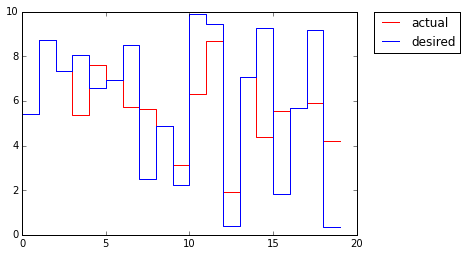

In [61]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline

np.random.seed(42)

n, m = 20, 50 # segments, lamps
a = np.random.rand(n, m) * 10 # matrix of illumination coefficients

p = Variable(m) # lamp powers vector

Iast = (np.random.rand(n) * 10).reshape((n, 1)) # desired illumination

constraints = [ (p[i] >= 1e-9) for i in xrange(m) ]

obj = Minimize(cvxpy.norm(a * p - Iast, 1))
prob = Problem(obj, constraints)
res = prob.solve(solver=CVXOPT)

print " value: ", res
values = np.array([np.float64(i) for i in p.value])
values = a.dot(values)
rng = range(len(values))

plt.step(rng, values,'r', label='actual')
plt.step(rng, Iast,'b', label='desired')

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)